# ***Exploratory Data Analisys - Análisis sobre los hábitos de vida del ciudadano***
## ➡️ **Primera exploración del Dataset descodificado y primeras visualizaciones**
------

### 🗒️**Bloque de contenidos:**

1. [Importación de módulos](#1-importación-de-módulos)
2. [Carga del dataset descodificado](#2-carga-del-dataset-descodificado)  
    2.1. [Vista general](#21-vista-general)  
    2.2. [Renombramiento de columnas](#22-renombramiento-de-columnas)  
3. [Exploración inicial general](#3-exploración-inicial-general)  
    3.1. [Tipos de datos](#31-tipos-de-datos)  
    3.2. [Valores nulos](#32-valores-nulos)  
    3.3. [Duplicados](#32-duplicados)   
4. [Distribución de las variables](#4-distribución-de-las-variables)  
    4.1. [Variables numéricas](#41-variables-numéricas)  
    4.2. [Variables categóricas](#42-variables-categóricas)  
5. [Diagnóstico de limpieza](#5-diagnóstico-de-limpieza)

### **1. Importación de módulos**

In [1]:
# Ajusto la ruta
%cd ..

c:\Users\sorim\Documents\Data_Science\Evolve\repos\projects-evolve\EDA


In [2]:
from scripts.cleaning import change_to_numeric
from scripts.variables import orden_categorias
from scripts.individual_visualization import visualizacion_general, visualizacion_duplicados, distribucion_numericas, distribucion_categoricas

import numpy as np
import pandas as pd


### **2. Carga del dataset descodificado**
####    ***2.1. Vista general***
Ahora que ya tenemos el dataset que queremos, lo cargamos y trabajamos sobre él.

Por lo que, en primer lugar, realizaremos una vista general de los datos.

In [3]:
df = pd.read_csv('./data/mapped_data.csv', low_memory = False) # Me salía un warning y me recomendó poner este argumento a False.
df.head()

,EXERANY2,ASTHMA3,CHCOCNC1,COLGSEX1,_AGEG5YR,INCOME3,_EDUCAG,EMPLOY1,_STATE,_BMI5CAT,SLEPTIM1,SMOKE100,ALCDAY4,MENTHLTH,GENHLTH,PHYSHLTH,DIABETE4,CVDCRHD4
0,No,No,No,NaN,Age 80 or older,Refused,Graduated from College or Technical School,Retired,Alabama,NaN,8.0,No,No drinks in past 30 days,NaN,Very good,NaN,Yes,No
1,No,No,Yes,NaN,Age 80 or older,"$25,000 to < $35,000",Graduated High School,Self-employed,Alabama,Overweight,6.0,No,No drinks in past 30 days,NaN,Excellent,NaN,No,No
2,Yes,No,No,NaN,Age 55 to 59,"$150,000 to < $200,000",Graduated from College or Technical School,Retired,Alabama,Overweight,5.0,No,No drinks in past 30 days,3.0,Very good,2.0,No,No
3,Yes,Yes,No,NaN,NaN,Don’t know/Not sure,Graduated High School,Retired,Alabama,Normal Weight,7.0,Yes,No drinks in past 30 days,NaN,Excellent,NaN,No,No
4,Yes,No,No,NaN,Age 40 to 44,"$25,000 to < $35,000",Attended College or Technical School,A homemaker,Alabama,Normal Weight,9.0,No,2 days per week,NaN,Fair,2.0,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   EXERANY2  445130 non-null  object
 1   ASTHMA3   445130 non-null  object
 2   CHCOCNC1  445129 non-null  object
 3   COLGSEX1  21 non-null      object
 4   _AGEG5YR  436053 non-null  object
 5   INCOME3   432200 non-null  object
 6   _EDUCAG   442749 non-null  object
 7   EMPLOY1   438936 non-null  object
 8   _STATE    445132 non-null  object
 9   _BMI5CAT  396326 non-null  object
 10  SLEPTIM1  445129 non-null  object
 11  SMOKE100  413355 non-null  object
 12  ALCDAY4   404369 non-null  object
 13  MENTHLTH  179900 non-null  object
 14  GENHLTH   445129 non-null  object
 15  PHYSHLTH  177308 non-null  object
 16  DIABETE4  445129 non-null  object
 17  CVDCRHD4  445130 non-null  object
dtypes: object(18)
memory usage: 61.1+ MB


Podemos observar que todas las columnas son de tipo `object` y hay nulos. Por lo que lo siguiente que realizaremos es:

- Cambiar el nombre de las columnas para que sean más significativas y sepamos en todo momento sobre qué información estamos trabajando

- Analizar cada variable y valorar si la podemos considerar como **categórica** o **numérica**.

- Analizar los `NaN`.

#### ***2.2. Renombramiento de columnas***
Para una mayor facilidad a la hora de explorar el dataset, realizaremos el cambio de nombre de las variables en este punto.

In [5]:
# Renombro las columnas
name_cols = {'EXERANY2': 'ejercicio',
             'SLEPTIM1': 'sueño_h',
             'SMOKE100': 'fumar',
             'ALCDAY4': 'alcohol',
             'MENTHLTH': 'salud_mental_malos',
             'GENHLTH': 'salud_general',
             'PHYSHLTH': 'salud_fisica_mala',
             'DIABETE4': 'diabetes',
             'CVDCRHD4': 'enf_cardio',
             'ASTHMA3': 'asma',
             'CHCOCNC1': 'cancer',
             'COLGSEX1': 'genero',
             '_AGEG5YR': 'grupo_edad',
             'INCOME3': 'ingresos',
             '_EDUCAG': 'educacion',
             'EMPLOY1': 'empleo',
             '_STATE': 'estado',
             '_BMI5CAT': 'IMC'}

df.rename(columns=name_cols, inplace=True)
df.sample()

,ejercicio,asma,cancer,genero,grupo_edad,ingresos,educacion,empleo,estado,IMC,sueño_h,fumar,alcohol,salud_mental_malos,salud_general,salud_fisica_mala,diabetes,enf_cardio
308456,Yes,No,Yes,NaN,Age 65 to 69,"$100,000 to < $150,000",Graduated from College or Technical School,Retired,Oregon,Normal Weight,8.0,Yes,1 day per week,2.0,Excellent,NaN,No,No


In [6]:
# Lo guardo para a posteriori
df.to_csv('./data/data_rename.csv', index=False)

### **3. Exploración inicial general**
#### ***3.1. Tipos de datos***

A continuación, veremos cada una de las variables y nos centraremos en la tipología de sus datos

In [7]:
visualizacion_general(df)


Tipo de variables de todo el DF:

ejercicio             object
asma                  object
cancer                object
genero                object
grupo_edad            object
ingresos              object
educacion             object
empleo                object
estado                object
IMC                   object
sueño_h               object
fumar                 object
alcohol               object
salud_mental_malos    object
salud_general         object
salud_fisica_mala     object
diabetes              object
enf_cardio            object
dtype: object 

****************************** 

--> Analizando la variable "ejercicio"


Cantidad de registros por cada valor:

ejercicio
Yes                    337559
No                     106480
Don’t know/Not sure       724
Refused                   367
NaN                         2
Name: count, dtype: int64 


Número de valores únicos: 4 

****************************** 

--> Analizando la variable "asma"


Cantidad de registros por c

Se puede observar:

- Ya que hay valores en cada variable de tipo numérico y de tipo categórico, todas las columnas son de **tipo `object`**.

- Hay variables con más nulos que en otras, sin embargo, ¿es conveniente transformarlas?

- En algunas variables se convendría pasarlas a tipo numérica por lo que, ¿qué hacemos con esas etiquetas como `Don’t know/Not Sure` y `Refused`?

- La variable `genero` dado a su alto contenido en nulos, se procedería a su eliminación ya que no aporta información relevante.


Por lo tanto, decidimos la siguiente conclusión:

- Con este análisis de cada variable, podemos clasificar en dos grandes grupos:

    - **Variables de tipo categórica**: `ejercicio`, `fumar`, `alcohol`, `salud_general`, `diabetes`, `enf_cardio`, `asma`, `cancer`, `grupo_edad`, `ingresos` (va por rangos), `educacion`, `empleo`, `estado` y `IMC`.

    - **Variables de tipo numérica**: `sueño_h`, `salud_mental_malos`, `salud_fisica_mala`.

    - **Variable eliminada**: `genero`

#### ***3.2. Valores nulos***

Para ver de manera más visual los nulos en cada variables, veremos qué porcentaje tiene cada una:

In [8]:
prc_nulo = df.isnull().sum() / len(df)*100
prc_nulo

ejercicio              0.000449
asma                   0.000449
cancer                 0.000674
genero                99.995282
grupo_edad             2.039620
ingresos               2.905206
educacion              0.535347
empleo                 1.391947
estado                 0.000000
IMC                   10.964388
sueño_h                0.000674
fumar                  7.138781
alcohol                9.157508
salud_mental_malos    59.585022
salud_general          0.000674
salud_fisica_mala     60.167321
diabetes               0.000674
enf_cardio             0.000449
dtype: float64

Analizando estos porcentajes de nulos (sin ver la catidad de valores Desconocidos como `Don't know/Not sure` y `Refused`), podemos tener una primera idea de qué hacer con estos valores.

En resumen:

- Todas las variables tienen valores `NaN` por lo que antes de ver cómo transformarlas tendremos en cuenta:

    - Los valores duplicados.

    - Si en una misma fila hay bastantes nulos.

- Imputación de valores `NaN`:
    - La variable `genero` quedaría fuera del análisis ya que no aporta información útil.
    - `salud_mental_malos` y `salud_fisica_mala` aunque tengan un gran número de nulos, convendría analizarla con las demás variables ya que pueden ser importantes.

#### ***3.3. Duplicados***

In [9]:
visualizacion_duplicados(df)

-> Número total de duplicados en el DF: 5390

-> Nulos en el DF de duplicados:

ejercicio                0
asma                     0
cancer                   0
genero                5390
grupo_edad              65
ingresos               454
educacion               17
empleo                 249
estado                   0
IMC                    576
sueño_h                  0
fumar                  517
alcohol                523
salud_mental_malos    5143
salud_general            0
salud_fisica_mala     5295
diabetes                 0
enf_cardio               0
dtype: int64


-> Nulos en el DF completo:

ejercicio                  2
asma                       2
cancer                     3
genero                445111
grupo_edad              9079
ingresos               12932
educacion               2383
empleo                  6196
estado                     0
IMC                    48806
sueño_h                    3
fumar                  31777
alcohol                40763
salud_mental_

Observando estos datos sobre los duplicados, podemos explicar que:

- De 445.132 valores, existen **5.390 filas en total** que están duplicadas.

- Además, podemos ver cómo quedarían los nulos eliminando los duplicados

- **2.806 sería las filas duplicadas dejando solo una ocurrencia**. Si decidimos eliminar las duplicadas con el método:

```python 
keep='first' 
```
Mantendríamos la primera ocurrencia para no eliminar información que fuese de utilidad

En conclusión:

- Tras un exhaustivo análisis, se plantea la posilidad de **eliminar las filas duplicadas manteniendo la primera ocurrencia.**

### **4. Distribución de las variables**

#### ***4.1. Variables numéricas***

Para poder hacer una vista de la distribución de aquellas **variables numéricas**, primero hay que convertirlas ya que todas, en su formato original es de tipo object.

In [10]:
cols_num = ['sueño_h', 'salud_mental_malos', 'salud_fisica_mala']

In [11]:
df_demo = change_to_numeric(df, cols_num)


In [12]:
df_demo.dtypes

ejercicio              object
asma                   object
cancer                 object
genero                 object
grupo_edad             object
ingresos               object
educacion              object
empleo                 object
estado                 object
IMC                    object
sueño_h               float64
fumar                  object
alcohol                object
salud_mental_malos    float64
salud_general          object
salud_fisica_mala     float64
diabetes               object
enf_cardio             object
dtype: object

In [13]:
df_demo.describe()

,sueño_h,salud_mental_malos,salud_fisica_mala
count,439679.000000,170836.000000,166386.000000
mean,7.022983,11.186869,11.346435
std,1.502425,10.171159,10.844877
min,1.000000,1.000000,1.000000
25%,6.000000,3.000000,2.000000
50%,7.000000,7.000000,6.000000
75%,8.000000,16.000000,20.000000
max,24.000000,30.000000,30.000000


In [14]:
# Quiero ver cuántas personas ha marcado que de media duermen 24h al día.
df_demo.loc[df_demo['sueño_h'] == 24,'sueño_h'].count()

np.int64(52)

In [15]:
df_demo.loc[(df_demo['sueño_h'] == 1) | (df_demo['sueño_h'] == 2),'sueño_h'].count()

np.int64(2703)

Se observa que:

- **`sueño_h`**:

    - Hay 52 personas que han marcado que de media, en un periodo de 24h, **duermen 24h**, es decir, duermen todo el día. Se puede considerar que estos 52 valores son nulos ya que es, matemáticamente imposible, que una persona duerma de media 24h en un día. 

    - También es muy interesante de 2.703 personas han marcado que duermen entre 1h y 2h al día. Por tema salud, no sería muy beneficioso, sin embargo, es más factible que una persona que duerma 24h. 

    - Después, se observa que la media y la mediana son valores muy parecidos con una desviación típica muy baja.

- **`salud_mental_malos`** y **`salud_fisica_mala`**:

    - Son variables más sencillas de leer aunque siempre se juega la baza de que las entradas estén mal codificadas.

    - En ambos casos, la desviación estándar es muy alta ya que la diferencia entre la media y a la mediana es elevada.

Para poder ver mejor la distribución de estas tres variables, visualizaremos de manera gráfica cada una de ellas, haciendo uso de **Histogramas y BoxPlot**

(3, 2)


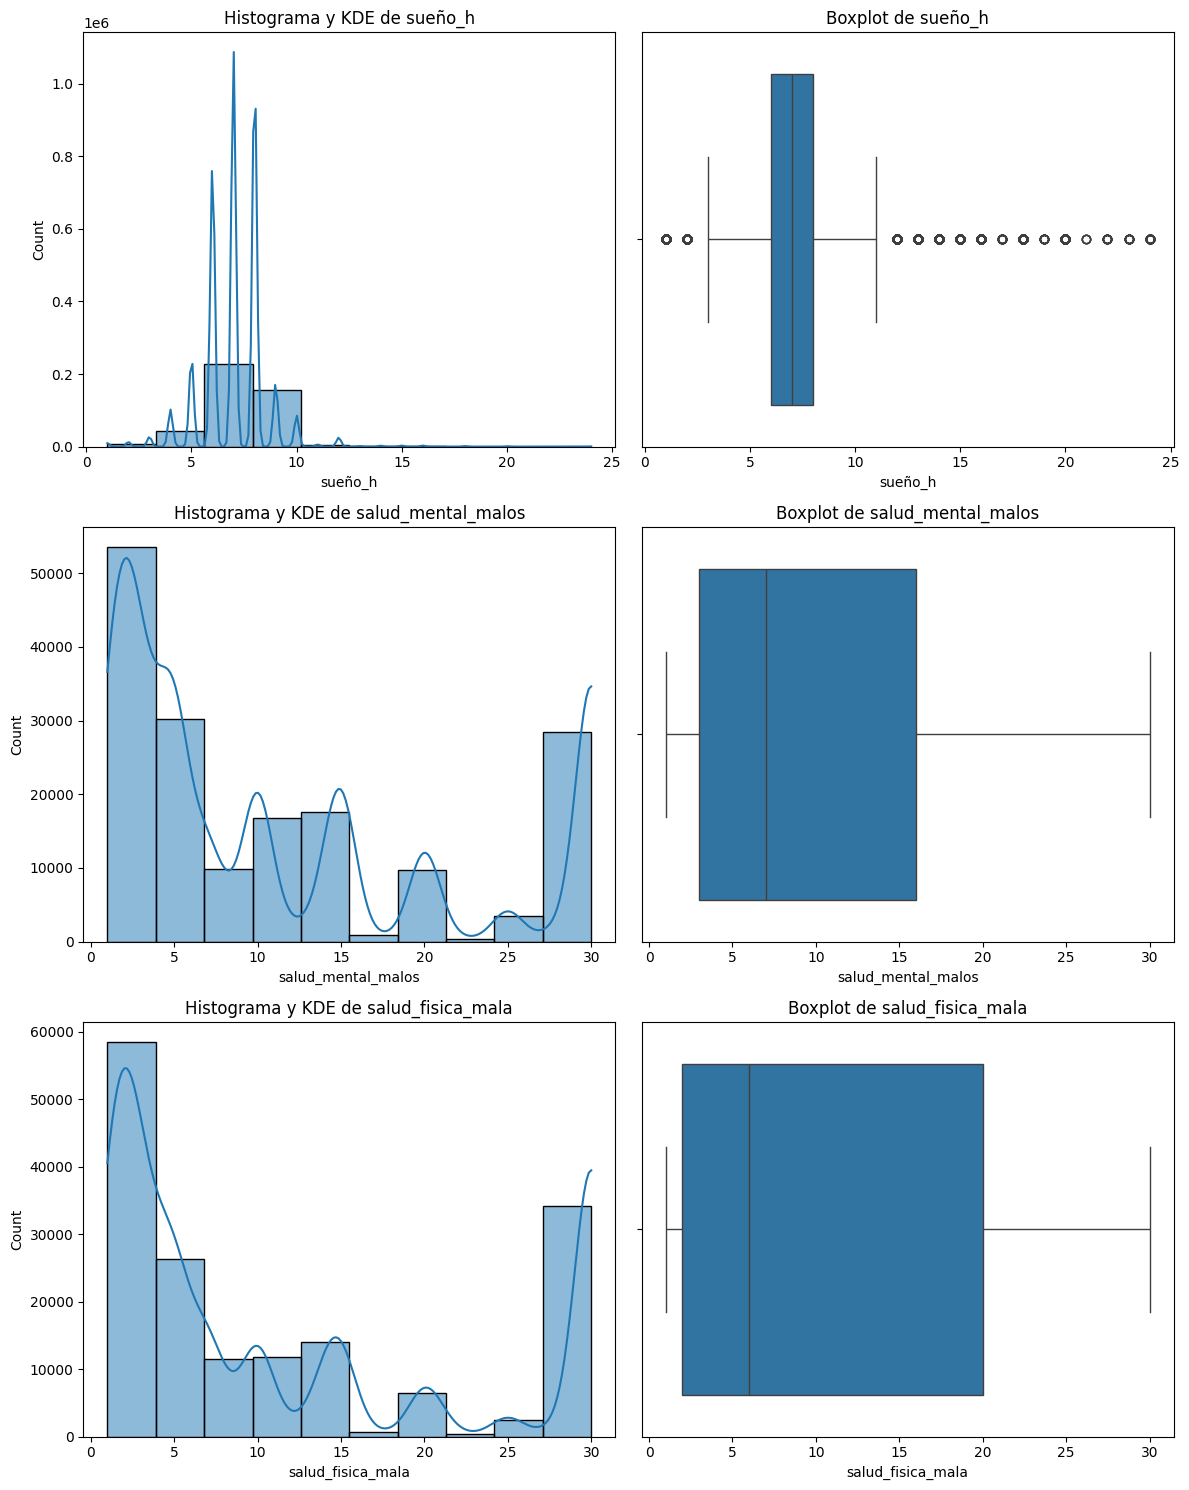

In [16]:
distribucion_numericas(df_demo, cols_num, bins=10)

- En **`sueño_h`** confirmamos que los valores se concentran entre los número 4 y 12, fuera de estos umbrales consideramos outliers todos los valores por debajo de 4 y por encima de 12. 

- En **`salud_mental_malos`** no se observan outliers concentrándose los datos entre el 4 y el 16, teniendo una ligera subida hacia el número 30.

- En **`salud_fisica_mala`** se concentran más lo datos entre los números 2 y 20 no teniendo anomalías, tenienodo un pico de subida en el 30.

Por lo tanto, podemos considera:

- La **NO imputación** de los valores nulos de estas tres variables dada a su importancia en el análisis.
- Reconsiderar la **eliminación de los outliers** en la variable `sueño_h`.

#### ***4.2. Variables categóricas***

En este caso, para poder analizar la distribución de las **variables categóricas**, visulizaremos el `value_counts()` de cada una de ellas. Además, ordenaremos de forma lógica cada una de las categorías ya que si realizamos un `sorted()`, se va a ordenar alfabéticamente.

Para esta ocasión, transformaremos los `NaN` por la palabra `NULO` y así contarlo como una categoría más.

También es importante destacar que se ha elaborado una función para la transformación del orden de los valores.

In [17]:
cols_cat = [col for col in df.columns if col not in cols_num]

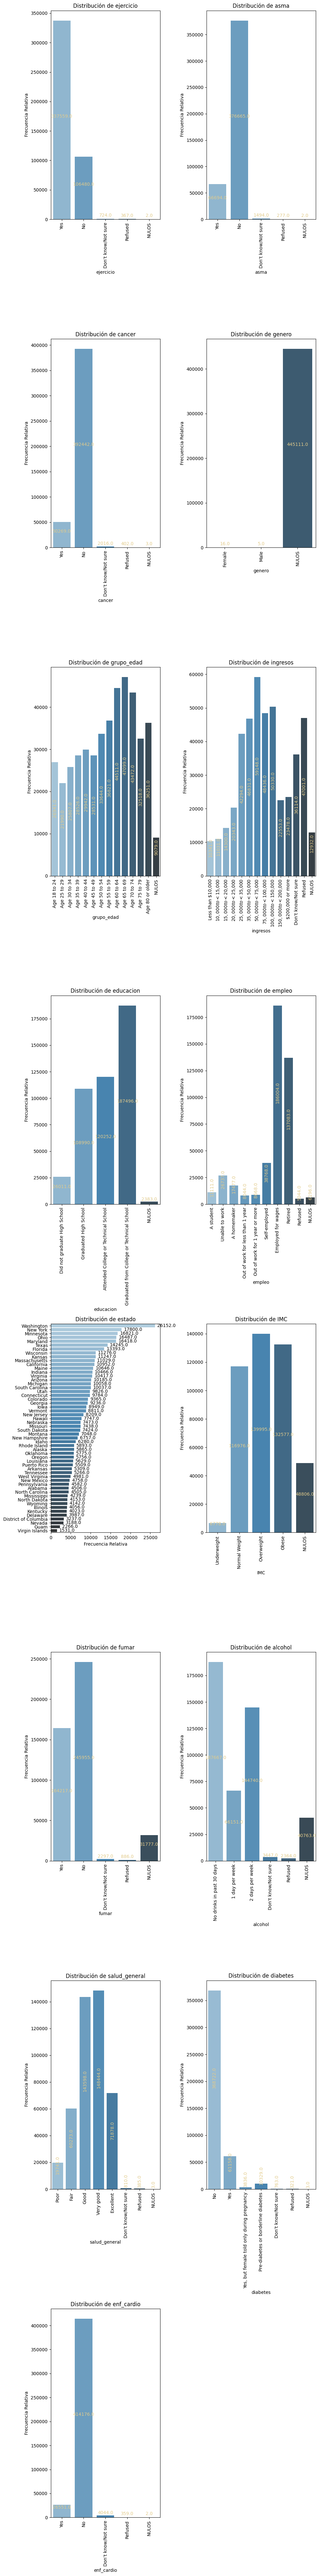

In [18]:
distribucion_categoricas(df_demo, orden_categorias, cols_cat, mostrar_valores=True)

*Observaciones*:
Se va a tratar como categorías "Desconocidas" aquellas que sean categorizadas tanto `Don't know/Not sure`, `Refused`, `NULOS` ya que las tres es información que no tenemos.

- **`ejercicio`**:
    - Prevalece más los datos que sí tenemos a los Desconocidos. 
    - Se observa que hay más personas que hacen ejercicio frente a las que no.
    - Esta variable, al tener pocos datos Desconocidos, es más probable que no se transformen sus valores.

- **`asma`**:
    - Mismo caso que en el anterior respecto a los datos Desconocidos.
    - En este caso, prevalecen más las personas que no tienen asma.
    - Podemos llegar a la misma conclusión que en la variable anterior.

- **`cancer`**:
    - Mismo caso que en el anterior respecto a los datos Desconocidos.
    - En este caso, prevalecen más las personas que no tienen cancer.
    - Podemos llegar a la misma conclusión que en la variable anterior.

- **`genero`**:
    - Se puede observar que la gran cantidad de NULOS prevalece de manera masiva a los datos de género en sí, por lo que esta variable no aporta ninguna información útil.
    - Esta variable, se procederá a su eliminación y no contaremos con ella para su análisis ya que una transformación de los NULOS sería incorporar sesgos.

- **`grupo_edad`**:
    - Los datos NULOS ocupan la menor parte de la capacidad de los datos de esta variable por lo que no tendría ninguna conscuencia a la hora de realizar el análisis. 
    - Se observa que esta encuesta lo ha realizado más personas con una edad superior a 50 años.

- **`ingresos`**:
    - Si calculamos la cantidad total de los valores Desconocidos, llegamos a la conclusión de que ocupan una gran cantidad de datos recogidos.
    - Independientemente de lo anterior, se observa que la encuesta se ha realizado por personas que tienen un nivel económico asequible (habrá que valorar si influye la zona en este nivel económico). La mitad de los valores corresponde a personas con un poder económico más elevado y la mitad inderior a los que menos tienen.

- **`educacion`**:
    - Prevalece más los datos que sí tenemos a los Nulos.
    - En este caso, prevalencen más las personas que sí se han graduado en la universidad o en la escuela técnica, seguido de las personas que únimente asistieron pero no han obtenido aún el graduado y, después, contamos con los que se graduaron en el instituto seguido de los que no.
    - Esta variable, al tener pocos datos Nulos, es más probable que no se transformen sus valores.

- **`empleo`**:
    - Los valores Desconocidos que aparecen en esta gráfica ocupan menor capacidad con respecto a la información útil que sí son válidas.
    - Se puede observar que hay más personas que han realizado la encuesta que trabajan por cuenta ajena seguido, a continuación, de personas que ya están jubiladas. Las personas que no tienen trabajo desde hace menos de un año o más son las que han realizado menos la encuensta.

- **`estado`**:
    - No hay valores Desconocidos.
    - Prevalece más los estados más importantes, como su capital, así como estados con mayor poder económico empresarial.

- **`IMC`**: Estos datos están categorizados según el **Índice de Masa Coporal (IMC)**, es decir, es la relación entre la masa corporal de una persona y su estatura. Según los valores propuestos por la **Organización Mundial de la Salud (OMS)**, el IMC es uno de los principales recursos para evaluar el estado nutricional.
    - Se observa que los NULOS ocupan un puesto destacable en la gráfica superando a las personas categorizadas con "bajo peso".
    - En el resto de datos, se observa, que la gran mayoría de las personas que realizaron la encuesta tienen sobrepeso y obsesidad. Sería interesante ver la relación entre esta variable y la de `ejercicio`

- **`fumar`**: 
    - Respecto a los valores Desconocidos, en cantidad no es muy relevante pero sí hay valores catalogados con este tipo de datos.
    - Además, se puede observar que la gran mayoría de las personas que han realizado la encuesta, no fuman.

- **`alcohol`**: 
    - Pasa lo mismo que en la anterior variable con respecto a los valores Desconocidos.
    - La gran mayoría de las peronas no han bebido en 30 días, seguido a las personas que beben 2 días a la semana (podemos intuir que es el fin de semana).

- **`salud_general`**: 
    - Prevalece más los datos que sí tenemos a los Desconocidos. 
    - La gran mayoría de las personas tienen, en general, buena salud.
    - Esta variable, al tener pocos datos Desconocidos, es más probable que no se transformen sus valores.

- **`diabetes`**: 
    - Prevalece más los datos que sí tenemos a los Desconocidos. 
    - Las mayor parte de las personas no tienen diabetes con una gran diferencia con respecto a los que sí tuviero o están en la pre-diabetes.
    - Esta variable, al tener pocos datos Desconocidos, es más probable que no se transformen sus valores.

- **`enf_cardio`**: 
    - Prevalece más los datos que sí tenemos a los Desconocidos.
    - La gran mayoría de las personas no han tenido enfermedades cardiovasculares.
    - Esta variable, al tener pocos datos Desconocidos, es más probable que no se transformen sus valores.

### **5. Diagnóstico de limpieza**

Con este ánilis exhaustivo de cada variable llegamos a la conclusión de realizar la **tranformación del dataset** teniendo en cuenta el siguiente orden:

1. Eliminar filas **duplicadas** manteniendo la primera ocurrencia.

2. Se **eliminarán las filas** con **más de la mitad de valores nulos** ya que ese registro no nos aporta información.

3. Se eliminará la variable `genero` por su alto contenido en nulos (99%).

4. Se creará una categoría `Unknow` en aquellas variables categóricas que contengan nulos.

5. En el resto de variables que contiene nulos, no se transformarán para no crear sesgos ya que la información que los encuestados dan es de vital importancia.

6. Se transformará el **tipo de las variables** en `salud_mental_malos` y `salud_fisica_mala` a **tipo numérica**.

7. Se **categorizará la variable `sueño_h`** poniendo rangos de:
    - Menos de 4h.
    - Entre 4 y 7h.
    - Más de 7h

En el siguiente notebook, [notebook 03](./03_Limpieza_y_preparacion.ipynb), se realizará el proceso de transformación.

--------